In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.model_selection import cross_val_score

from sklearn.linear_model import SGDClassifier,RidgeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

import pywFM

In [2]:
def predict_result(clf,X_test):
    Y_pred=clf.predict(X_test)
    res_file=open('result.csv', 'w')
    for y_item in Y_pred:
      res_file.write("%s\n" % y_item)
    res_file.close()

In [27]:
X=pd.read_csv('x_train.csv',delimiter=";",header=None,names=['f'+str(i) for i in range (223)])
y=pd.read_csv('y_train.csv',names=['class'])
y=y['class']
X_test=pd.read_csv('x_test.csv',delimiter=";",header=None,names=['f'+str(i) for i in range (223)])

In [45]:
clf=SGDClassifier(random_state=42)
parameters = {
    
    'loss': ('log', 'hinge'),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.001, 0.0001, 0.00001, 0.000001]
}

print ()
print ("GRID SEARCH:")
grid_search = GridSearchCV(clf, parameters, cv=5)
grid_search.fit(X, y)
print ("Best %0.3f" % ( grid_search.best_score_))
print ("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ("\t%s: %r" % (param_name, best_parameters[param_name]))

print ()
print ("CROSS VALIDATION:")
clf = SGDClassifier(**best_parameters)
scores = cross_val_score(clf, X, y,    cv=5)
print ('Best : %0.3f (+/- %0.2f)' % \
    (scores.mean(), scores.std() / 2))




GRID SEARCH:


ValueError: Invalid parameter loss for estimator RidgeClassifier. Check the list of available parameters with `estimator.get_params().keys()`.

In [32]:
clf=SGDClassifier(random_state=42,alpha=0.001,loss='log',penalty='l1')
cur_set= ['f138', 'f11', 'f37', 'f221', 'f182', 'f61', 'f64', 'f93']
score=cross_val_score(clf, X[cur_set],y,cv=5)
print (score.mean())

0.518782142889


In [53]:
X_scaler

array([[ -1.37302755e+00,   6.49730481e-01,   7.91919411e-01, ...,
          1.56758335e+00,   5.93095987e-01,   4.67598589e-01],
       [  1.72202498e+00,   5.24754495e-01,   4.54135464e-01, ...,
         -2.02650490e-04,  -8.92129044e-01,   1.48597442e+00],
       [  1.36384032e+00,  -1.61102509e+00,  -1.32369063e+00, ...,
          4.86129905e-01,  -5.64614920e-01,   4.19402044e-01],
       ..., 
       [ -8.90778438e-01,   1.34854123e+00,   1.04773770e+00, ...,
         -5.95782237e-01,   5.01690462e-01,  -4.07033568e-01],
       [ -2.41272729e-01,  -1.20569919e+00,  -1.05327153e+00, ...,
          1.51528839e+00,   4.83307223e-02,  -1.15023449e+00],
       [  4.77410963e-02,   3.55613310e-01,   4.11631082e-01, ...,
          7.41845597e-01,   6.56660238e-01,   9.09716356e-01]])

In [56]:
scaler=StandardScaler()
cur_set= ['f138', 'f11', 'f37', 'f221', 'f182', 'f61', 'f64', 'f93']
X_scaler=X
X_scaler=scaler.fit_transform(X_scaler)
clf=SGDClassifier(random_state=42,alpha=0.001,loss='log',penalty='l1')
score=cross_val_score(clf, X_scaler,y,cv=5)
print (score.mean())


0.444805066228


In [44]:
for i in range(2,223):
    model = PCA(n_components=i,random_state=1)
    data_pca_1=model.fit_transform(X)
    score=cross_val_score(clf, data_pca_1,y,cv=5)
    print (i,score.mean())



2 0.402121765815
3 0.404692755022
4 0.40927814091
5 0.386927271617
6 0.390954736295
7 0.368887950923
8 0.384347211179
9 0.378934720773
10 0.354260789646
11 0.382908827556
12 0.384951906844
13 0.367750438091
14 0.388639124839
15 0.403562190857
16 0.410428784226
17 0.413583956609
18 0.413287953165
19 0.408700975834
20 0.420750567967
21 0.412447223602
22 0.403251897764
23 0.404430874996
24 0.409019119727
25 0.40842633882
26 0.411285107256
27 0.411868851028
28 0.427078147116
29 0.438525964834
30 0.437106022909
31 0.439951227484
32 0.432235279733
33 0.430213189897
34 0.441975031132
35 0.43595040055
36 0.429947604094
37 0.439694237068
38 0.447994289153
39 0.431095718414
40 0.434807168811
41 0.443395016603
42 0.442828896944
43 0.429042456961
44 0.449675715325
45 0.441113380288
46 0.43883712128
47 0.443126077253
48 0.424489847127
49 0.439960233967
50 0.448534146765
51 0.449130163513
52 0.441973367913
53 0.445983222472
54 0.439111722956
55 0.431925416574
56 0.447681090188
57 0.43911418604
58 0.

KeyboardInterrupt: 

In [34]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score
#from sklearn.cross_val_score import cross_val_score as cv_score

def plot_scores(d_scores,d_opt):
    n_components = np.arange(1,d_scores.size+1)
    plt.plot(n_components, d_scores, 'b', label='PCA scores')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('cv scores')
    plt.legend(loc='lower right')
    plt.axvline(d_opt,ls='dotted')
    plt.show()


In [35]:
# 1 Для каждого значения d в интервале [1,D] построить модель PCA с d главными компонентами.
D=X.shape[1]
d_scores=pd.DataFrame(columns=['score'])
for d in range (1,D+1):
    model = PCA(n_components=d,random_state=2,svd_solver='full')
    # 2 Оценить средний логарифм правдоподобия данных для каждой модели на генеральной совокупности,
    d_scores.loc[d]=cv_score(model, X).mean()
# 3 Найти модель, для которой он максимален, и внести в файл ответа число компонент в данной модели, т.е. значение  d_opt
d_opt=d_scores['score'].argmax()
plot_scores(d_scores['score'].as_matrix(),d_opt)
write_answer_1(d_opt)

KeyboardInterrupt: 

In [38]:
from sklearn.decomposition import PCA
from sklearn.cross_validation import cross_val_score as cv_score
def plot_variances(d_variances,d_opt):
    n_components = np.arange(1,d_variances.size+1)
    plt.plot(n_components, d_variances, 'b', label='Component variances')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('variance')
    plt.legend(loc='upper right')
    plt.axvline(d_opt,ls='dotted')
    plt.show()
data=X

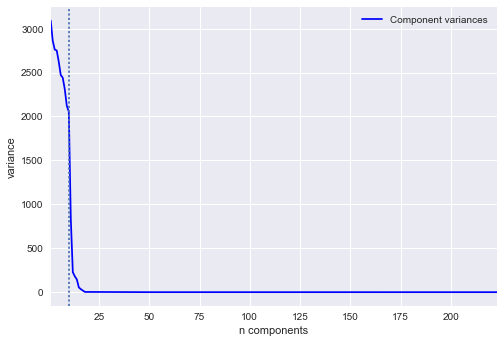

d_opt 10


In [40]:
# 1 Построить модель PCA с  DD  главными компонентами по этим данным.
D=data.shape[1]
model = PCA(n_components=D,random_state=1)
# 2 Спроецировать данные на главные компоненты.
data_pca=model.fit_transform(data)
# 3 Оценить их дисперсию вдоль главных компонент.
d_variances=model.explained_variance_
# 4 Отсортировать дисперсии в порядке убывания и получить их попарные разности
d_variances=np.sort(d_variances, axis=None)
d_variances=d_variances[::-1]
d_variances_diff=np.zeros([D-1])
for i in range(d_variances.size-1):
    d_variances_diff[i]=(d_variances[i]-d_variances[i+1])
# 5 Найти разность с наибольшим значением и получить по ней оценку на эффективную размерность данных d
d_opt=d_variances_diff.argmax()+1
# 6 Построить график дисперсий и убедиться, что полученная оценка на  d_opt действительно имеет смысл, 
# после этого внести полученное значение  d̂ optd^opt  в файл ответа.
plot_variances(d_variances,d_opt)
print ("d_opt",d_opt)